# Can You Initialize the Zero Weights for Training

The intuitive answer before truely thinking through is *yes*, WHY NOT, but the performance for find the minimal won't be that good.

I have to say, this is sooooooo WRONG, let's get one step back to the fundamental of how a nerual network works, is we mutiply each weigh matrix layer by layer until it gets to the output layer. So have that in mind, you still think zeros as the initial weigh is possible? The answer is an absolute NO, because if the the weigh matrices are all zeros the output without thinking are all zeros, which is impossible to back-propagate therefore the network never have chance to learn.

In this tour, I will walk through how the initilize techniques we have on the market work.

## Imports

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
from fastai.basics import *
from fastai.vision import *
from fastai.callbacks import *

In [ ]:
plt.style.use(['dark_background'])

## Create Some Data and a FCN 

In [ ]:
data = torch.FloatTensor(np.random.randn(2000,800)); data

tensor([[ 0.2135, -0.3113,  0.0697,  ...,  0.1736, -1.1487, -0.6545],
        [-0.4734,  0.3924,  0.7735,  ...,  1.0700, -0.2897, -1.8524],
        [-1.4813, -0.7573, -1.1807,  ..., -1.0410,  1.1441, -0.1490],
        ...,
        [ 1.6636, -0.3926, -0.3045,  ..., -0.6179, -1.0831, -1.0690],
        [ 1.3336,  0.9516, -0.9143,  ...,  0.1596, -0.1548, -1.3640],
        [ 0.4393, -1.4306,  0.5062,  ...,  1.6864, -0.2537,  0.0266]])

In [ ]:
szs = [800-50*i for i in range(0,10)]; szs

[800, 750, 700, 650, 600, 550, 500, 450, 400, 350]

In [ ]:
n_layers = len(szs); n_layers

10

In [ ]:
def cal_acts(coeff=1.0,act_func=torch.tanh):
    fcs=[]
    for i in range(0, n_layers-1):
        x = data if i==0 else fcs[i-1]
        sz_in,sz_out = szs[i],szs[i+1]
        if isinstance(coeff, float): w = nn.Parameter(torch.FloatTensor(np.random.randn(sz_in, sz_out))) * coeff
        elif coeff=='xavier':        w = nn.Parameter(torch.FloatTensor(np.random.randn(sz_in, sz_out))) / np.sqrt(sz_in)
        else:                        w = nn.Parameter(torch.FloatTensor(np.random.randn(sz_in, sz_out))) / np.sqrt(sz_in/2)
        fc = torch.mm(x,w)
        fc = act_func(fc)
        fcs.append(fc)
    return fcs

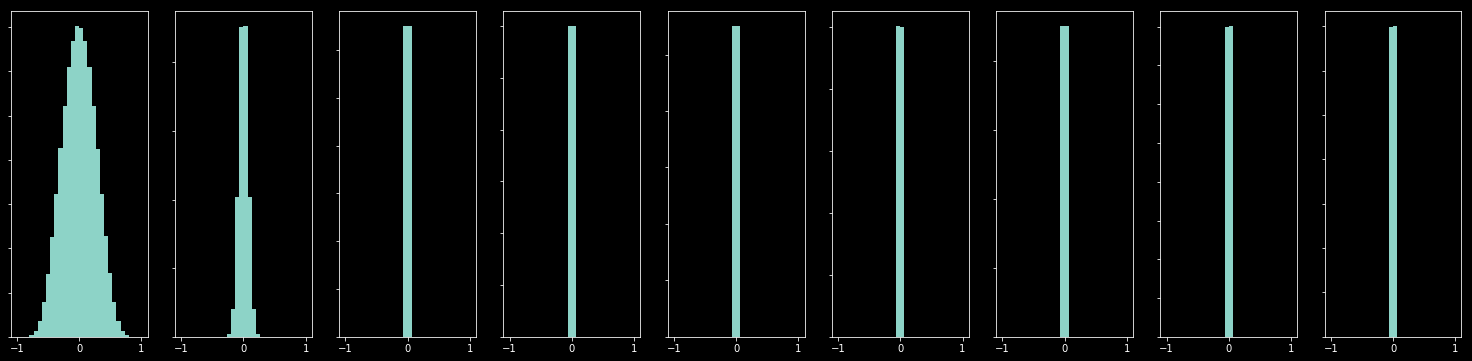

In [ ]:
coeff=0.01

fig,axs = plt.subplots(1, n_layers-1, figsize=(26,6))
for i,ax in enumerate(axs.flatten()):
    ax.hist(cal_acts(coeff)[i].flatten(),30,range=[-1,1])
    ax.set_yticklabels([])

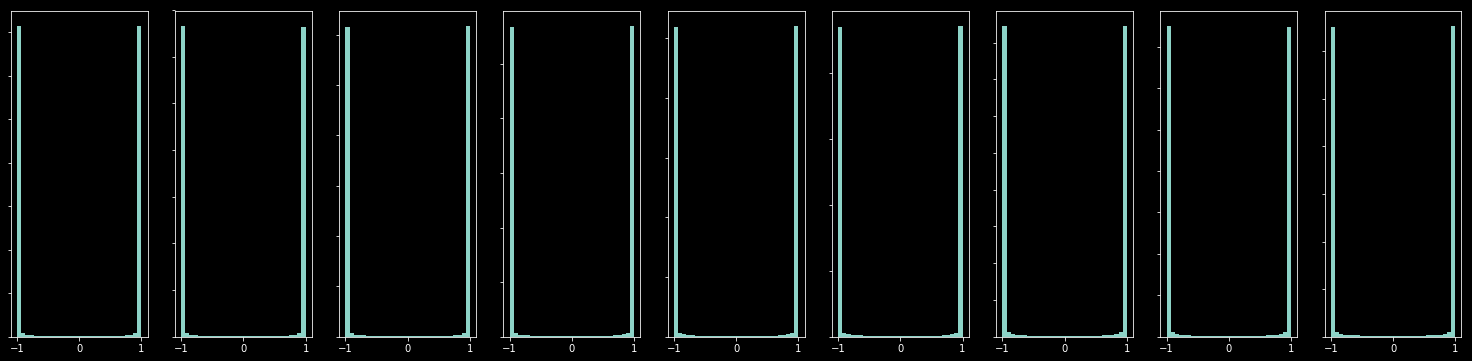

In [ ]:
coeff=1.0

fig,axs = plt.subplots(1, n_layers-1, figsize=(26,6))
for i,ax in enumerate(axs.flatten()):
    ax.hist(cal_acts(coeff)[i].flatten(),30,range=[-1,1])
    ax.set_yticklabels([])

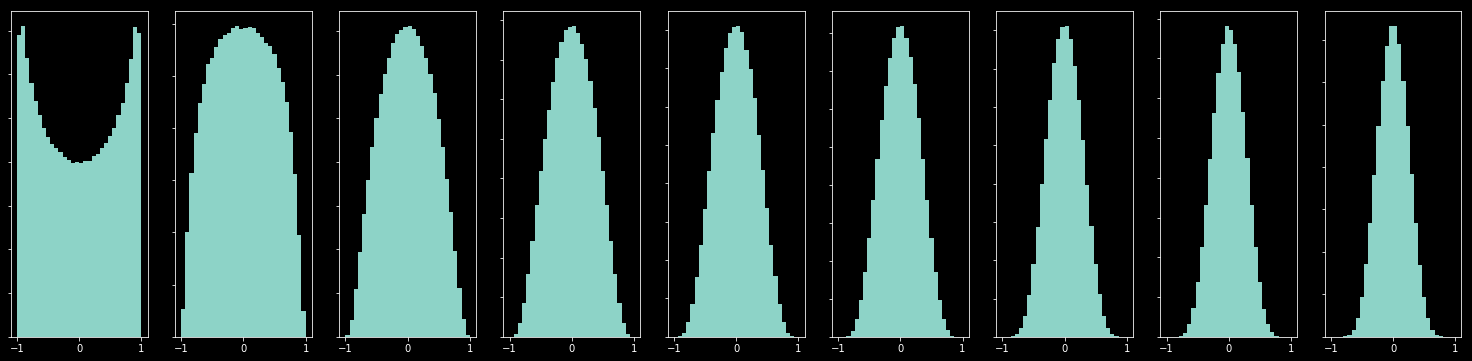

In [ ]:
coeff = 'xavier'

fig,axs = plt.subplots(1, n_layers-1, figsize=(26,6))
for i,ax in enumerate(axs.flatten()):
    ax.hist(cal_acts(coeff)[i].flatten(),30,range=[-1,1])
    ax.set_yticklabels([])

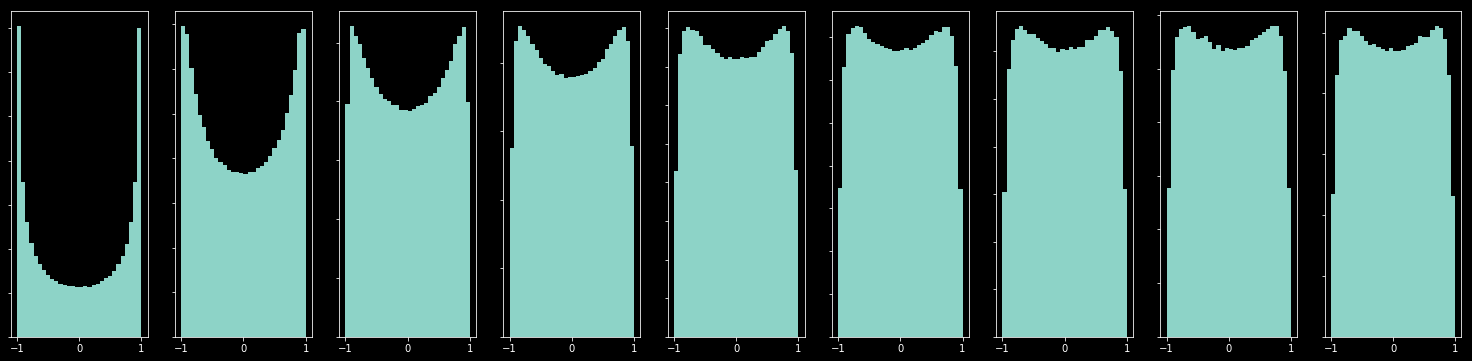

In [ ]:
coeff = 'kaihe'

fig,axs = plt.subplots(1, n_layers-1, figsize=(26,6))
for i,ax in enumerate(axs.flatten()):
    ax.hist(cal_acts(coeff)[i].flatten(),30,range=[-1,1])
    ax.set_yticklabels([])

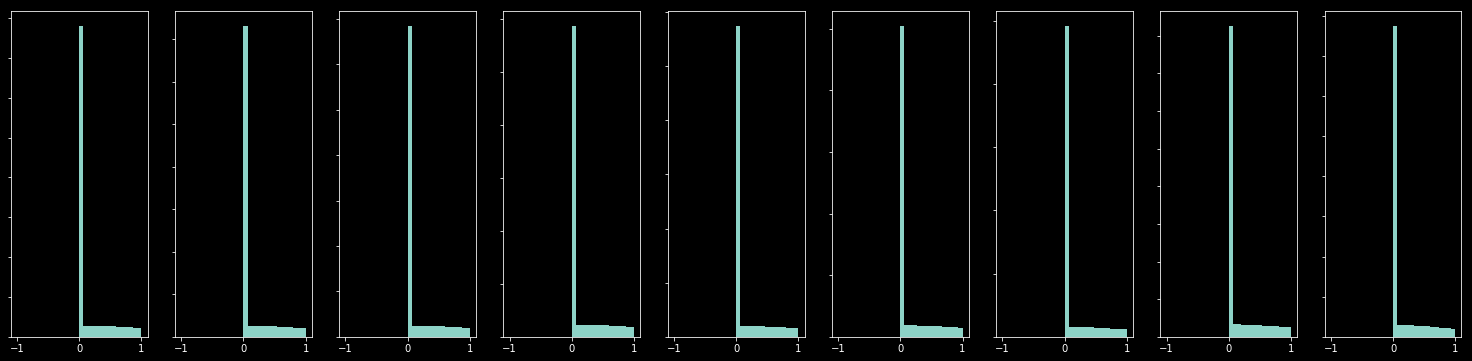

In [ ]:
coeff = 'kaihe'

fig,axs = plt.subplots(1, n_layers-1, figsize=(26,6))
for i,ax in enumerate(axs.flatten()):
    ax.hist(cal_acts(coeff, torch.relu)[i].flatten(),30,range=[-1,1])
    ax.set_yticklabels([])

## EON